## OCR with EasyOCR
https://github.com/JaidedAI/EasyOCR

In [10]:
from easyocr import Reader
import cv2
from PIL import ImageFont, ImageDraw, Image
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

## Parameters

In [2]:
languages_list = ["en", "es"]

## Importing the image

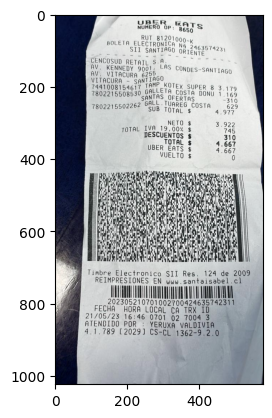

In [3]:
img = cv2.imread('../images/1c5e5931-8337-40bb-9ff6-3718b941c902.JPG')
original = img.copy()

plt.imshow(img)
plt.show()

## Text recognition

In [4]:
import ssl

# deactivate ssl verification
ssl._create_default_https_context = ssl._create_unverified_context

reader = Reader(languages_list, gpu=True)
results = reader.readtext(img)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


In [11]:
pprint(results)

[([[223, 11], [315, 11], [315, 49], [223, 49]], 'Y#xd%', 0.017916398683280592),
 ([[301, 29], [325, 29], [325, 45], [301, 45]], 'OP', 0.9495162529715983),
 ([[336, 31], [388, 31], [388, 56], [336, 56]], '8650', 0.9916084408760071),
 ([[140, 68], [240, 68], [240, 92], [140, 92]],
  'BOLETA EL',
  0.6415627944753598),
 ([[233, 53], [337, 53], [337, 95], [233, 95]],
  'RUTR8*28}',
  0.19806523459303207),
 ([[236, 54], [304, 54], [304, 78], [236, 78]], 'RUT 81', 0.9077053787823064),
 ([[245, 75], [477, 75], [477, 113], [245, 113]],
  'SARONAGS 8812463574251',
  0.16228612394528397),
 ([[95, 115], [188, 115], [188, 143], [95, 143]],
  'CENCOSUD',
  0.9298680809237894),
 ([[194, 122], [262, 122], [262, 146], [194, 146]],
  'RETAIL',
  0.984959594995721),
 ([[97, 137], [123, 137], [123, 155], [97, 155]], 'Av', 0.8755802819023245),
 ([[137, 135], [220, 135], [220, 162], [137, 162]],
  'KENNEDY',
  0.9495666954548077),
 ([[226, 140], [270, 140], [270, 164], [226, 164]], '9001', 0.83248370885849

## Text

In [12]:
font = './MerchantCopy.ttf'

def write_text(text, x, y, img, font, color=(50,50,255), font_size=22):
  font = ImageFont.truetype(font, font_size)
  img_pil = Image.fromarray(img)
  draw = ImageDraw.Draw(img_pil)
  draw.text((x, y - font_size), text, font = font, fill = color)
  img = np.array(img_pil)
  return img

## Bouding box
- lt = left top
- rt = rigth top
- br = bottom right
- bl = bottom left

In [13]:
def box_coordinates(box):
  (lt, rt, br, bl) = box
  lt = (int(lt[0]), int(lt[1]))
  rt = (int(rt[0]), int(rt[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))
  return lt, rt, br, bl

In [14]:
results[0][0]

[[223, 11], [315, 11], [315, 49], [223, 49]]

In [15]:
box_coordinates(results[0][0])

((223, 11), (315, 11), (315, 49), (223, 49))

In [16]:
def draw_img(img, lt, br, color=(200,255,0),thickness=2):
  cv2.rectangle(img, lt, br, color, thickness)
  return img

Y#xd% ->  0.017916398683280592
OP ->  0.9495162529715983
8650 ->  0.9916084408760071
BOLETA EL ->  0.6415627944753598
RUTR8*28} ->  0.19806523459303207
RUT 81 ->  0.9077053787823064
SARONAGS 8812463574251 ->  0.16228612394528397
CENCOSUD ->  0.9298680809237894
RETAIL ->  0.984959594995721
Av ->  0.8755802819023245
KENNEDY ->  0.9495666954548077
9001 ->  0.83248370885849
CONDES-SANTIAGO ->  0.3598270043352147
Av ->  0.9214096382677734
VITACURA ->  0.973239380983607
6255 ->  0.9991919994354248
ViTAcURa ->  0.4353462082119282
744100815467 ->  0.791903631081003
GALEeka ->  0.06654471403559448
SUPER ->  0.9997649440648877
79 ->  0.9999979769518709
7802215508530 ->  0.8388095179872801
costa Donu ->  0.5516744303078771
16 ->  0.9249905758529101
GALL ->  0.9651597738265991
OFERTAs ->  0.616812030125486
310 ->  0.9999107338403134
7802215502262 ->  0.9996154213371227
SUB ->  0.9993141164348309
costa ->  0.42542601096934507
629 ->  0.9998314482159665
4 , 977 ->  0.4515250384133476
NETO ->  0.4925

<function matplotlib.pyplot.show(close=None, block=None)>

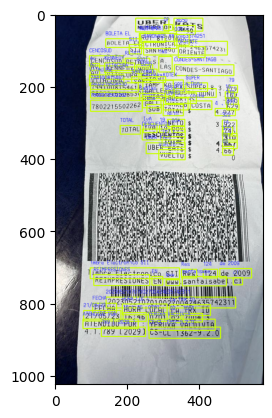

In [18]:
img = original.copy()
for (box, text, probability) in results:
  print(text, '-> ', probability)
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br)
  img = write_text(text, lt[0], lt[1], img, font)
  
plt.imshow(img)
plt.show

## Text with background

In [19]:
def text_background(text, x, y, img, font, font_size=32, color=(200,255,0)):
  background = np.full((img.shape), (0,0,0), dtype=np.uint8)
  text_back = write_text(text, x, y, background, font, font_size=font_size)
  text_back = cv2.dilate(text_back, (np.ones((3,5), np.uint8)))
  fx, fy, fw, fh = cv2.boundingRect(text_back[:,:,2])
  cv2.rectangle(img, (fx, fy), (fx + fw, fy + fh), color, -1)
  return img

In [20]:
font = './MerchantCopy.ttf'
languages_list = ['en', 'es']

In [23]:
img = cv2.imread('../images/208fcc65-e37f-4574-b305-5f399e7d1402.JPG')
reader = Reader(languages_list, gpu=True)
results = reader.readtext(img)

Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


'BOLETA'

In [24]:
for (box, text, probability) in results:
  print(text, '-> ', probability)

BOLETA ->  0.998373300426175
FuT ->  0.17091421664438158
89440400-0 ->  0.993798354847676
M* 343391 ->  0.4108516545437896
PROuIdehct ->  0.10980764602450811
NUTRIMIENTO S A ->  0.4585107591091642
Lasu Haliiz:wvik[hea7o ->  0.02709996870124237
Luis IhAyeh UjedA 8/4 , Prouinencia ->  0.01866201919853328
Shnt /ago ->  0.10775901663458409
Giru ->  0.10693784058094025
seavicius De Al ihentncIuk ->  0.07739639028349739
EnphesAs ->  0.3663655180104781
Luca| ->  0.31177615658031443
Cafetei 1 Beppo ->  0.19545674264646495
Dareccton; ->  0.16095787294410194
laza ->  0.2789420783519745
hnui ->  0.04492621123790741
CA JA ->  0.24850790459083422
Ferhp ->  0.20471883346978234
202?-09*0J Har 0 ->  0.25242549764949274
10259.12 ->  0.34969720703752255
[uunta ->  0.794410277693938
10698s (Iper adol ->  0.25615670532975304
CA JA Llfuna ->  0.09979163888255384
Ilnal. ->  0.10524204399977927
SM5Iula ->  0.07543213984357533
Descf ivCion ->  0.055397420882192135
Cant . ->  0.470608631916361
Yrorio ->  0.133

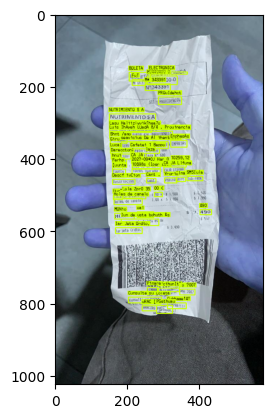

In [22]:
for (box, text, probability) in results:
  lt, rt, br, bl = box_coordinates(box)
  img = draw_img(img, lt, br, (200,255,0))
  img = text_background(text, lt[0], lt[1], img, font, 18, (200,255,0))
  img = write_text(text, lt[0], lt[1], img, font, (0,0,0), 18)

plt.imshow(img)
plt.show()